In [266]:
%pylab inline
import random
import sklearn

Populating the interactive namespace from numpy and matplotlib


In [263]:
def clamp(x, a, b):
    if x < a: return a
    if x > b: return b
    return x

In [204]:
def get_random_point_from_normal(mean=0, sd=1):
    x = max(min(np.random.normal(mean, sd), 3*sd), -3*sd)
    y = max(min(np.random.normal(mean, sd), 3*sd), -3*sd)
    return x, y

In [210]:
def generate_two_distanced_clusters(n=25, mean=0, sd=1, distance=1):
    v = (distance, distance)
    X1 = np.array([get_random_point_from_normal() for _ in range(n)]) + v
    X2 = np.array([get_random_point_from_normal() for _ in range(n)]) - v
    return X1, X2

In [307]:
def generate_two_linear_blobs(n=25, noise=0.01):
    X = [random.uniform(-1, 1) for _ in range(n)]
    r = 2/3
    left = [(x, np.random.normal(0, noise)) for x in X if x < -1 + r]
    mid = [(x, np.random.normal(0, noise)) for x in X if x > -1 + r and x < -1 + 2*r]
    right = [(x, np.random.normal(0, noise)) for x in X if x > -1 + 2*r]
    return np.array(mid), np.array(left + right)

In [337]:
def duoscatter(X1, X2):
    plt.figure(figsize=(8, 8))
    x1, y1 = zip(*X1)
    plt.scatter(x1, y1, marker='+', c='blue', s=100, lw=1)
    x2, y2 = zip(*X2)
    plt.scatter(x2, y2, marker='x', c='r', s=100, lw=1)
    plt.grid()
    plt.axhline(0, lw=1, ls='dashed', c='black')
    plt.axvline(0, lw=1, ls='dashed', c='black')
    plt.title('Two distanced clusters (normally distributed)')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend(['x=0', 'y=0', 'Cluster 1', 'Cluster 2'])

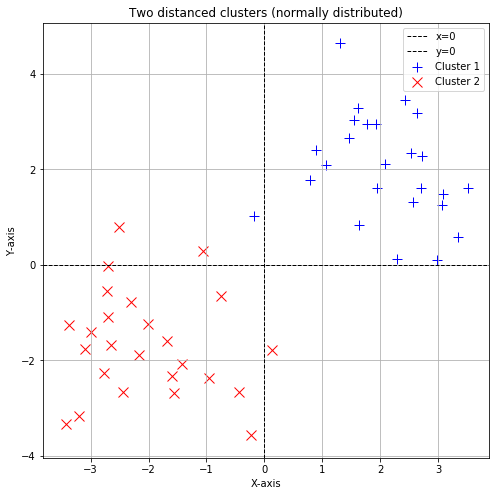

In [338]:
X1, X2 = generate_two_distanced_clusters(n=25, distance=2)
duoscatter(X1, X2)

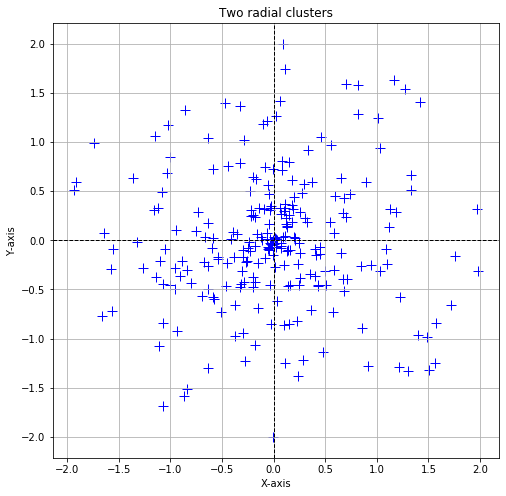

In [284]:
n = 250
sd = 1
clip = 2
R = [clamp(np.random.normal(0, 1), -clip*sd, clip*sd) for _ in range(n)]
Phi = [random.uniform(0, 2*math.pi) for _ in range(n)]
x = R * np.cos(Phi)
y = R * np.sin(Phi)
plt.figure(figsize=(8,8))
plt.grid()
plt.axhline(0, lw=1, ls='dashed', c='black')
plt.axvline(0, lw=1, ls='dashed', c='black')
plt.title('Two radial clusters')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
scatter(x, y, c='blue', marker='+', lw=1, s=100)

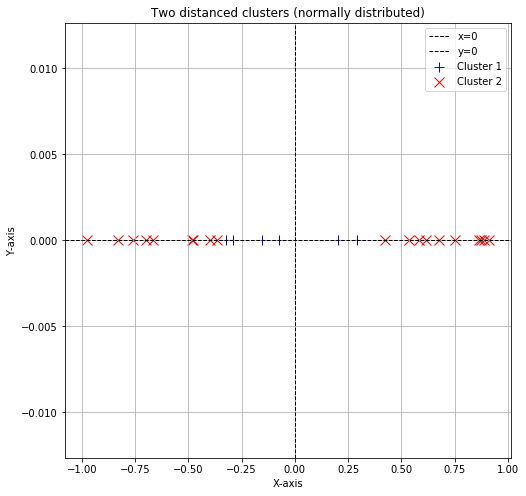

In [309]:
X1, X2 = generate_two_linear_blobs(noise=0)
duoscatter(X1, X2)

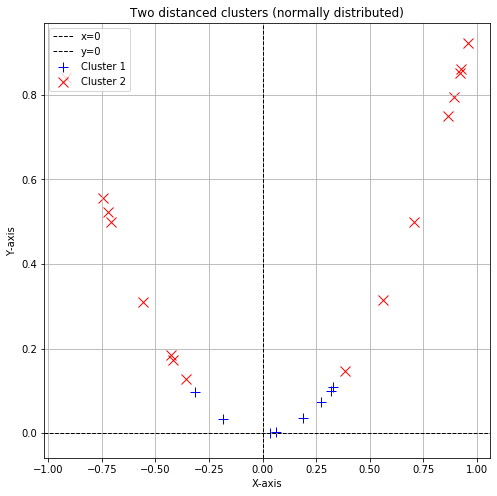

In [319]:
X1, X2 = generate_two_linear_blobs(noise=0)
X1Q = [(x, x*x) for x, y in X1]
X2Q = [(x, x*x) for x, y in X2]
duoscatter(X1Q, X2Q)

In [320]:
def polar_to_cartesian(X):
    return [(r*sin(phi), r*cos(phi)) for r, phi in X]

In [327]:
def cartesian_to_polar(X):
    return [(math.sqrt(x*x+y*y), math.atan2(x, y)) for x, y in X]

In [328]:
polar_to_cartesian([(1,2)])

[(0.9092974268256817, -0.4161468365471424)]

In [329]:
cartesian_to_polar([(0.9, -0.41)])

[(0.9889893831583836, 1.9982606398101221)]

Text(0.5, 1.0, 'Polar space')

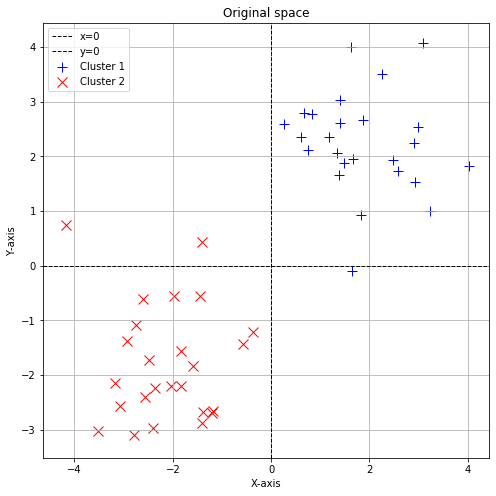

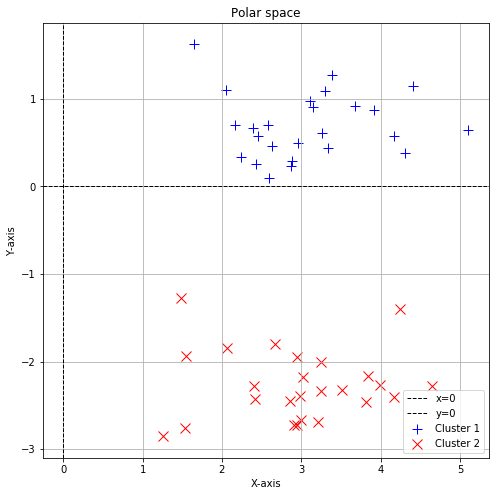

In [341]:
X1, X2 = generate_two_distanced_clusters(n=25, distance=2)
duoscatter(X1, X2)
plt.title('Original space')
X1p = cartesian_to_polar(X1)
X2p = cartesian_to_polar(X2)
duoscatter(X1p, X2p)
plt.title('Polar space')